# CAPM - Capital Asset Pricing Model 

In this project, we are building a CAPM model for Apple using linear regression, then further introducing what a perfectly correlating stock to the market reveals in relation to CAPM.
____

## Imports

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import pandas_datareader as web

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

____
## API Selection

- The API we've chosen for the assignment one was was provided by Yahoo https://www.yahoofinanceapi.com

- API's are freely available but be cautious with yahoo as at times it can be deprecated.

____
## Get the Data

#### Collecting Raw Data:

- The below code uses Yahoo Finances API to get The SPDR S&P 500 trust (SPY ETF is an exchange-traded fund which trades on the NYSE Arca under the symbol. It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.

- Further retrieve labeled financial data for Apple Inc using Yahoo Finances API.

- I've set each Apple and the SPDR S&P 500 to be a separate dataframe, with the variable being the aapl and spy_etf


The below code uses the API to retrieve the stocks data of the following companies between Jan 4th 2010 to July 18th 2017.

* Apple
* SPY ETF

In [4]:
#Time variable to get the Raw data from the API 
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [5]:
spy_etf = web.DataReader('SPY','yahoo',start,end)
aapl = web.DataReader('aapl','yahoo',start,end)

In [6]:
#Preview of the SPY ETF dataset (First Five Records)
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,90.205025
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,90.443817
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,90.507492
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,90.889519
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,91.191971


In [7]:
#Preview of the Apple dataset (First Five Records)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562589
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573936
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469367
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457409
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500340


#### Data check

- Looking for missing data to see if processing is needed.
- Checking if any of the numeric data is a string.

In [8]:
#Calculates the sum of all the null values in all the fields(columns)
aapl.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
#Further check if any of the numeric data is not string
aapl.dtypes.value_counts()

float64    6
dtype: int64

In [10]:
#Calculates the sum of all the null values in all the fields(columns)
spy_etf.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
#Further check if any of the numeric data is not string
spy_etf.dtypes.value_counts()

float64    6
dtype: int64

#### Pre-Processing Completed

- We can see that there is no Null value in the data, and all stock values are not strings.

- This means there are no values in the dataset such as "Not Available" or "NA", etc.

- Both of these are highly indicative that all values are present.

## Explorative Data Analysis

In the following, we will be focusing on the closing price to understand the exact cash positions of the stocks end of day.

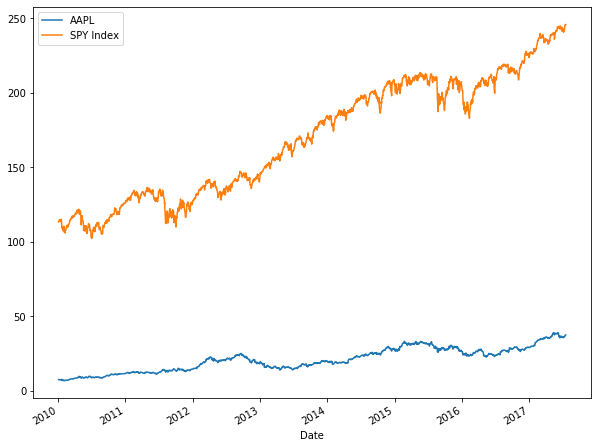

In [32]:
#Plots the closing prices of both stock in a line graph for comparisons
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

#### Interpretation

- The market index value per share, being SPY_ETF exceeds the value of individual Apple stock within the given time period.

### Cumulative Returns

- The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one. Reinvesting the dividends or capital gains of an investment impacts its cumulative return.

In [13]:
#Creates a new dataframe for appl and spy_etf by dividing the t+n Close price by t=0 Close price
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

In [14]:
#Preview of the Apple cumulative dataset (First Five Records)
aapl['Cumulative'].head()

Date
2010-01-04    1.000000
2010-01-05    1.001729
2010-01-06    0.985795
2010-01-07    0.983973
2010-01-08    0.990514
Name: Cumulative, dtype: float64

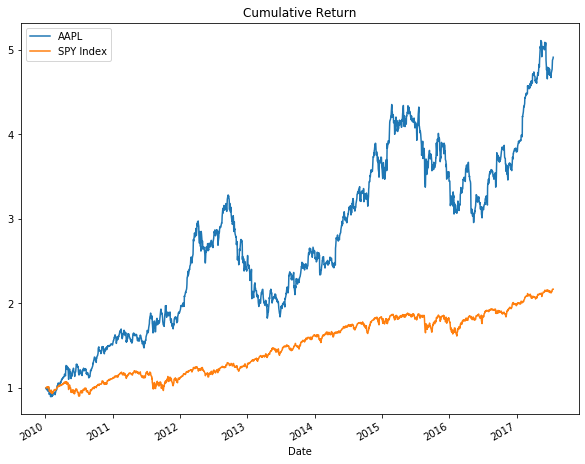

In [15]:
#Plots the clsing prices of both stock in a line graph for comparisons
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return');

#### Interpretation

- On a cumulative returns basis Apples returns exceed the market.

### Daily Returns

Created a new empty DataFrame called returns. This dataframe contains the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We use pandas pct_change() method on the Close column to create a column representing this return value. First row will have null values due to the above formula.

In [16]:
#Using pct_change(1) to create daily returns.
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

In [17]:
#Preview of daily return data set.
#Note that the 1st year is NaN, this is due to the faily return formula.
aapl['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Daily Return, dtype: float64

## CAPM model

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.
	  
      
                                       ER =Rf +β(ERm − Rf)


where:

ER = expected return of investment

Rf = risk-free rate

β = beta of the investment

(ERm − Rf) = market risk premium	

In [60]:
#Linear regression using Scikit
#iloc[:1] as loc[0] = n/a due to daily reutrn formula
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:],aapl['Daily Return'].iloc[1:])

In [61]:
# measures a stock's relative volatility–that is, it shows how much the price of a particular stock jumps
# up and down compared with how much the entire stock market jumps up and down. 
#If a share price moves exactly in line with the market, then the stock's beta is 1
beta

0.9479229050786183

In [62]:
# Alpha (α) is a term used in investing to describe an investment strategy's ability to beat the market. 
# Alpha is thus also often referred to as “excess return” or “abnormal rate of return,”.

alpha

0.0005404570492612061

In [63]:
# correlation
r_value

0.5556582033773629

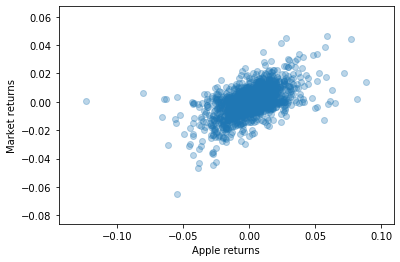

In [64]:
# maps apples returns again spy_etf
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)
plt.xlabel('Apple returns')
plt.ylabel('Market returns');

### Interperation

- information

## What if our stock was completely related to SP500?

The following is used to explain what an asset that mimics the market looks like.

In [65]:
# creating artifical noice using the random library 
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [66]:
# preview of noice array
noise

array([-0.00058649, -0.00060423, -0.00060776, ..., -0.00034494,
        0.00027888,  0.00069373])

In [67]:
# creation of fake stock being the spy_etf + artifical noice
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

In [68]:
# linear regression using Scikit with the fake stock
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [69]:
# relationship with the market is near absolute
beta

0.9905911689843184

In [70]:
# fake_stocks ability to beat the market is relatively low
alpha

-2.0260772138532555e-05

In [71]:
# correlation is near 1, due to the similarity between the returns
r_value

0.9943576374403091

''

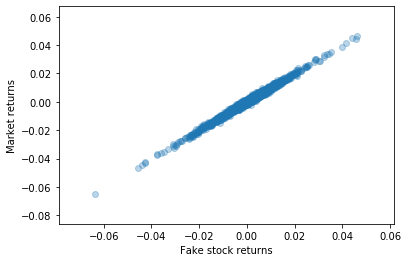

In [56]:
# maps fake stock returns again spy_etf
plt.scatter(fake_stock ,spy_etf['Daily Return'].iloc[1:] ,alpha=0.3)
plt.xlabel('Fake stock returns')
plt.ylabel('Market returns');

#### Interpretation

When both stocks have similar returns, the relationship between both stocks are linear as shown above.